In [1]:
import json
import csv
import tweepy
import re

In [2]:
def search_for_hashtags(consumer_key, consumer_secret, access_token, access_token_secret, hashtag_phrase):
    
    #create authentication for accessing Twitter
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)

    #initialize Tweepy API
    api = tweepy.API(auth)
    
    #get the name of the spreadsheet we will write to
    fname = '_'.join(re.findall(r"#(\w+)", hashtag_phrase))

    #open the spreadsheet we will write to
    with open('%s.csv' % (fname), 'w',encoding="utf-8") as file:

        w = csv.writer(file)

        #write header row to spreadsheet
        w.writerow(['userid','timestamp', 'tweet_text', 'username', 'all_hashtags', 'followers_count','following_count','allnumberoftweetscount','retweets','likes'])

        #for each tweet matching our hashtags, write relevant info to the spreadsheet
        for tweet in tweepy.Cursor(api.search, q=hashtag_phrase+' -filter:retweets', \
                                   lang="en", tweet_mode='extended').items(300):
            w.writerow([tweet.user.id,tweet.created_at, tweet.full_text.replace('\n',' ').encode('utf-8'), tweet.user.screen_name.encode('utf-8'), [e['text'] for e in tweet._json['entities']['hashtags']], tweet.user.followers_count,tweet.user.friends_count,
                        tweet.user.statuses_count,tweet._json['retweet_count'],tweet._json['favorite_count']])

In [3]:
consumer_key = 'EcbCbw2BrCtOMiuCfvK6LFHDT'
consumer_secret = '9H3KE9a6sa9sZ1KvwVfOdcsVDzAF3wNFGZz3ct50Ct1JZNCV4z'
access_token = '1285558135550164992-4PSqDWqvIqXnHYqGcmQ53dp7fLd6US'
access_token_secret = 'sHK1w8DfCy7IAHjhwnd3yWParkLkxbx7HZBqLU2W1whoo'
    
hashtag_phrase = '#ai OR #cloud OR #blockchain OR #iot'

if __name__ == '__main__':
    search_for_hashtags(consumer_key, consumer_secret, access_token, access_token_secret, hashtag_phrase)

In [1]:

import pandas as pd

df1 = pd.read_csv('ai_cloud_blockchain_iot (3).csv', engine='python')
df1
dff=df1.copy()


In [3]:
dff=dff.drop(['timestamp'], axis = 1)
dff

,userid,tweet_text,username,all_hashtags,followers_count,following_count,allnumberoftweetscount,retweets,likes
0,1280881940351107074,"b""#Siacoin hits three-tenths of a penny! $136...",b'BuildForFreedom',"['Siacoin', 'Bitcoin', 'Ethereum', 'cryptocurr...",63,85,479,1,2
1,729754661213884416,"b'New article: ""Bulls hit the free-agent marke...",b'FinTechZoom',"['Fintech', 'Blockchain', 'Crypto', 'Cryptocur...",4580,360,101229,0,0
2,1241749653013630976,b'\xf0\x9f\x92\xbb#Montreal #tech firm GSoft g...,b'NancyTr83158469',"['Montreal', 'tech', 'digital', 'office', 'Sta...",1898,1816,4985,10,10
3,16579474,"b""Get real! Don't believe everything you see,...",b'JohnOneFive',"['FakeFaces', 'ArtificialIntelligence', 'AI', ...",2603,0,189,4,0
4,2794378935,b'Are you looking to rapidly expand your home ...,b'patriciamerch10',"['videoconferencing', 'stayconnected', 'cloud']",387,721,1409,1,2
5,729754661213884416,"b'New article: ""America Airlines - Struggling...",b'FinTechZoom',"['Fintech', 'Blockchain', 'Crypto', 'Cryptocur...",4580,360,101229,0,0
6,254848319,b'The 10 Coolest IoT Startups Of 2020 #iot #ii...,b'connect4growth',"['iot', 'iiot', 'internetofthings']",1060,2769,3416,1,0
7,2211900062,b'@berkinovy I calculated Xrp could go down 14...,b'crypto_hal9k',"['Bitcoin', 'Altcoins', 'crypto', 'cryptocurre...",52,53,653,1,0
8,277468962,b'Is Blockchain the Perfect Defense Against DD...,b'PenTestMag',"['pentest', 'magazine', 'pentestmag', 'pentest...",18003,699,9422,5,4
9,148103797,b'Here\xe2\x80\x99s how #Technology has change...,b'PaulMBaker',"['Technology', 'world', 'bigdata', 'AI', 'IoT'...",2366,3334,21273,3,1


In [10]:
df=df1.copy()
df.head()

,userid,timestamp,tweet_text,username,all_hashtags,followers_count,following_count,allnumberoftweetscount,retweets,likes
0,1280881940351107074,2020-11-21 23:59:25,"b""#Siacoin hits three-tenths of a penny! $136...",b'BuildForFreedom',"['Siacoin', 'Bitcoin', 'Ethereum', 'cryptocurr...",63,85,479,1,2
1,729754661213884416,2020-11-21 23:58:56,"b'New article: ""Bulls hit the free-agent marke...",b'FinTechZoom',"['Fintech', 'Blockchain', 'Crypto', 'Cryptocur...",4580,360,101229,0,0
2,1241749653013630976,2020-11-21 23:58:52,b'\xf0\x9f\x92\xbb#Montreal #tech firm GSoft g...,b'NancyTr83158469',"['Montreal', 'tech', 'digital', 'office', 'Sta...",1898,1816,4985,10,10
3,16579474,2020-11-21 23:58:24,"b""Get real! Don't believe everything you see,...",b'JohnOneFive',"['FakeFaces', 'ArtificialIntelligence', 'AI', ...",2603,0,189,4,0
4,2794378935,2020-11-21 23:57:21,b'Are you looking to rapidly expand your home ...,b'patriciamerch10',"['videoconferencing', 'stayconnected', 'cloud']",387,721,1409,1,2


In [11]:
df['all_hashtags'].describe()

count                                                   500
unique                                                  366
top       ['Fintech', 'Blockchain', 'Crypto', 'Cryptocur...
freq                                                     56
Name: all_hashtags, dtype: object

In [12]:
df["all_hashtags"] = df["all_hashtags"].str.strip('][').str.split(', ')  

In [13]:
df=df.set_index(["userid","timestamp","tweet_text","username","followers_count","following_count","allnumberoftweetscount","retweets","likes"]).all_hashtags.apply(pd.Series).stack().reset_index(["userid","timestamp","tweet_text","username","followers_count","following_count","allnumberoftweetscount","retweets","likes"], name='all_hashtags')

In [14]:
df['all_hashtags']=df['all_hashtags'].str.lower()

In [15]:
tags=["'blockchain'","'ai'","'cloud'","'iot'"]

In [16]:
df = df[df.all_hashtags.isin(tags)]

In [17]:
df_new=df.copy()
df_new

,userid,timestamp,tweet_text,username,followers_count,following_count,allnumberoftweetscount,retweets,likes,all_hashtags
5,1280881940351107074,2020-11-21 23:59:25,"b""#Siacoin hits three-tenths of a penny! $136...",b'BuildForFreedom',63,85,479,1,2,'cloud'
1,729754661213884416,2020-11-21 23:58:56,"b'New article: ""Bulls hit the free-agent marke...",b'FinTechZoom',4580,360,101229,0,0,'blockchain'
6,1241749653013630976,2020-11-21 23:58:52,b'\xf0\x9f\x92\xbb#Montreal #tech firm GSoft g...,b'NancyTr83158469',1898,1816,4985,10,10,'ai'
2,16579474,2020-11-21 23:58:24,"b""Get real! Don't believe everything you see,...",b'JohnOneFive',2603,0,189,4,0,'ai'
2,2794378935,2020-11-21 23:57:21,b'Are you looking to rapidly expand your home ...,b'patriciamerch10',387,721,1409,1,2,'cloud'
...,...,...,...,...,...,...,...,...,...,...
0,177997886,2020-11-21 22:17:12,"b'As knowledge grows exponentially, the new fu...",b'ZGJR',11486,5597,54856,1,4,'ai'
6,534563976,2020-11-21 22:17:00,b'Download Free eBook (47-page PDF) \xe2\x80\x...,b'KirkDBorne',272066,9664,128498,49,173,'ai'
1,1097139451682349056,2020-11-21 22:17:00,b'My Home Assistant config contains 13983 line...,b'anchoragehouse2',96,46,7237,0,0,'iot'
0,1182383258824314880,2020-11-21 22:16:57,b'NEW from Google AI! #AI #Google https://t....,b'DavidRa20284933',1,1,21,0,0,'ai'


In [18]:
df_new['Blockchain']=0.0
df_new['Cloud']=0.0
df_new['IOT']=0.0
df_new['AI']=0.0

In [19]:
df_new=df_new.reset_index(drop=True)

In [20]:
for ind in df_new.index: 
    if df_new['all_hashtags'][ind]=="'blockchain'":
        df_new['Blockchain'][ind]=1
    elif df_new['all_hashtags'][ind]=="'cloud'":
        df_new['Cloud'][ind]=1
    elif df_new['all_hashtags'][ind]=="'ai'":
        df_new['AI'][ind]=1
    else:
        df_new['IOT'][ind]=1

<ipython-input-20-745744b628d6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Cloud'][ind]=1
<ipython-input-20-745744b628d6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Blockchain'][ind]=1
<ipython-input-20-745744b628d6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['AI'][ind]=1
<ipython-input-20-745744b628d6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [21]:
df_new.head()

,userid,timestamp,tweet_text,username,followers_count,following_count,allnumberoftweetscount,retweets,likes,all_hashtags,Blockchain,Cloud,IOT,AI
0,1280881940351107074,2020-11-21 23:59:25,"b""#Siacoin hits three-tenths of a penny! $136...",b'BuildForFreedom',63,85,479,1,2,'cloud',0.0,1.0,0.0,0.0
1,729754661213884416,2020-11-21 23:58:56,"b'New article: ""Bulls hit the free-agent marke...",b'FinTechZoom',4580,360,101229,0,0,'blockchain',1.0,0.0,0.0,0.0
2,1241749653013630976,2020-11-21 23:58:52,b'\xf0\x9f\x92\xbb#Montreal #tech firm GSoft g...,b'NancyTr83158469',1898,1816,4985,10,10,'ai',0.0,0.0,0.0,1.0
3,16579474,2020-11-21 23:58:24,"b""Get real! Don't believe everything you see,...",b'JohnOneFive',2603,0,189,4,0,'ai',0.0,0.0,0.0,1.0
4,2794378935,2020-11-21 23:57:21,b'Are you looking to rapidly expand your home ...,b'patriciamerch10',387,721,1409,1,2,'cloud',0.0,1.0,0.0,0.0


In [22]:
df_new=df_new.drop(['all_hashtags'], axis = 1) 


In [23]:
df_new1=df_new.copy()

In [24]:
df_new1 = df_new.groupby(['tweet_text']).sum()
df_new1=df_new1.reset_index(drop=True)
df_new1
gh=df_new1.copy()

In [25]:
df_new1
n1=df_new1.copy()
n1

,userid,followers_count,following_count,allnumberoftweetscount,retweets,likes,Blockchain,Cloud,IOT,AI
0,1280881940351107072,63,85,479,1,2,0.0,1.0,0.0,0.0
1,840479603143630848,44,1,63939,0,1,1.0,0.0,0.0,0.0
2,1252165525565779968,1308,1296,2208,3,20,1.0,0.0,0.0,0.0
3,941804156754460672,10942,621,6291,5,32,1.0,0.0,0.0,0.0
4,14847675,96680,70721,254096,1,5,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
494,1040425579,97,361,719,7,2,0.0,0.0,0.0,1.0
495,3323214369,218,64,39216,0,0,0.0,0.0,0.0,1.0
496,1032594621417828352,471,1573,13627,1,0,0.0,0.0,1.0,0.0
497,3323214369,218,64,39216,0,0,0.0,0.0,0.0,1.0


In [26]:
df_new1['Retweet and likes']=0.0

In [27]:
for ind in df_new1.index:
    df_new1['Retweet and likes'][ind]=((df_new1['Blockchain'][ind]*(df_new1['retweets'][ind]+df_new1['likes'][ind]))+(df_new1['Cloud'][ind]*(df_new1['retweets'][ind]+df_new1['likes'][ind]))+(df_new1['IOT'][ind]*(df_new1['retweets'][ind]+df_new1['likes'][ind]))+(df_new1['AI'][ind]*(df_new1['retweets'][ind]+df_new1['likes'][ind])))

<ipython-input-27-c1f210754ca6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new1['Retweet and likes'][ind]=((df_new1['Blockchain'][ind]*(df_new1['retweets'][ind]+df_new1['likes'][ind]))+(df_new1['Cloud'][ind]*(df_new1['retweets'][ind]+df_new1['likes'][ind]))+(df_new1['IOT'][ind]*(df_new1['retweets'][ind]+df_new1['likes'][ind]))+(df_new1['AI'][ind]*(df_new1['retweets'][ind]+df_new1['likes'][ind])))


In [28]:
df_new1.head()

,userid,followers_count,following_count,allnumberoftweetscount,retweets,likes,Blockchain,Cloud,IOT,AI,Retweet and likes
0,1280881940351107072,63,85,479,1,2,0.0,1.0,0.0,0.0,3.0
1,840479603143630848,44,1,63939,0,1,1.0,0.0,0.0,0.0,1.0
2,1252165525565779968,1308,1296,2208,3,20,1.0,0.0,0.0,0.0,23.0
3,941804156754460672,10942,621,6291,5,32,1.0,0.0,0.0,0.0,37.0
4,14847675,96680,70721,254096,1,5,0.0,0.0,0.0,1.0,6.0


In [29]:
from sklearn import preprocessing
column_names=['Retweets_likes_normalized']
x = df_new1[['Retweet and likes']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)
#print(x_scaled)


# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled,columns = column_names)
df_normalized

for i in df_normalized.index:
    df_normalized['Retweets_likes_normalized'][i]=df_normalized['Retweets_likes_normalized'][i]*100
df_normalized 

,Retweets_likes_normalized
0,0.500000
1,0.166667
2,3.833333
3,6.166667
4,1.000000
...,...
494,1.500000
495,0.000000
496,0.166667
497,0.000000


In [30]:
from sklearn import preprocessing
column_names=['followers_count_normalized']
x = df_new1[['followers_count']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized1= pd.DataFrame(x_scaled,columns = column_names)
#df_normalized1.rename(columns={'0':'population'}, inplace=True)
df_normalized1
for i in df_normalized1.index:
    df_normalized1['followers_count_normalized'][i]=df_normalized1['followers_count_normalized'][i]*100
df_normalized1

,followers_count_normalized
0,0.011394
1,0.007903
2,0.240200
3,2.010729
4,17.767596
...,...
494,0.017643
495,0.039880
496,0.086376
497,0.039880


In [31]:
f_column = df_normalized1["followers_count_normalized"]
df_normalized = pd.concat([df_normalized,f_column], axis = 1)
df_normalized

,Retweets_likes_normalized,followers_count_normalized
0,0.500000,0.011394
1,0.166667,0.007903
2,3.833333,0.240200
3,6.166667,2.010729
4,1.000000,17.767596
...,...,...
494,1.500000,0.017643
495,0.000000,0.039880
496,0.166667,0.086376
497,0.000000,0.039880


In [32]:
for ind in df_new1.index:
    if df_new1['Blockchain'][ind]==1.0:
        df_new1['Blockchain'][ind]=df_normalized['Retweets_likes_normalized'][ind]
    if df_new1['Cloud'][ind]==1.0:
        df_new1['Cloud'][ind]=df_normalized['Retweets_likes_normalized'][ind]
    if df_new1['IOT'][ind]==1.0:
        df_new1['IOT'][ind]=df_normalized['Retweets_likes_normalized'][ind]
    if df_new1['AI'][ind]==1.0:
        df_new1['AI'][ind]=df_normalized['Retweets_likes_normalized'][ind]

<ipython-input-32-22ce55c83cec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new1['Cloud'][ind]=df_normalized['Retweets_likes_normalized'][ind]
<ipython-input-32-22ce55c83cec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new1['Blockchain'][ind]=df_normalized['Retweets_likes_normalized'][ind]
<ipython-input-32-22ce55c83cec>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new1['AI'][ind]=df_normalized['Retweets_likes_no

In [33]:
df_new2=df_new1.copy()

In [34]:
df_new2['activity']=1.0
df_new2

,userid,followers_count,following_count,allnumberoftweetscount,retweets,likes,Blockchain,Cloud,IOT,AI,Retweet and likes,activity
0,1280881940351107072,63,85,479,1,2,0.000000,0.5,0.000000,0.0,3.0,1.0
1,840479603143630848,44,1,63939,0,1,0.166667,0.0,0.000000,0.0,1.0,1.0
2,1252165525565779968,1308,1296,2208,3,20,3.833333,0.0,0.000000,0.0,23.0,1.0
3,941804156754460672,10942,621,6291,5,32,6.166667,0.0,0.000000,0.0,37.0,1.0
4,14847675,96680,70721,254096,1,5,0.000000,0.0,0.000000,1.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
494,1040425579,97,361,719,7,2,0.000000,0.0,0.000000,1.5,9.0,1.0
495,3323214369,218,64,39216,0,0,0.000000,0.0,0.000000,0.0,0.0,1.0
496,1032594621417828352,471,1573,13627,1,0,0.000000,0.0,0.166667,0.0,1.0,1.0
497,3323214369,218,64,39216,0,0,0.000000,0.0,0.000000,0.0,0.0,1.0


In [35]:
#df_new2=df_new2.groupby(['userid']).sum()
df_new2=df_new2.groupby(['userid','followers_count'])[["Blockchain", "Cloud", "IOT","AI","activity"]].sum()

In [36]:
#df_new2=df_new2.groupby(['userid','followers_count'])[["Blockchain", "Cloud", "IOT","AI","activity"]].sum()
df_new2.reset_index(inplace=True)
df_new2

,userid,followers_count,Blockchain,Cloud,IOT,AI,activity
0,6021882,185,0.000000,0.0,0.000000,0.500000,1.0
1,9212692,973,0.000000,0.0,0.000000,0.000000,1.0
2,9455172,1480,0.000000,0.0,0.333333,0.000000,1.0
3,11510772,615,0.500000,0.0,0.000000,0.000000,1.0
4,13584132,4056,0.000000,0.0,0.166667,0.000000,1.0
...,...,...,...,...,...,...,...
343,2279062151407181824,466,0.000000,0.0,31.333333,31.333333,2.0
344,2341604009311789056,3172,0.000000,0.0,5.333333,5.333333,1.0
345,2358400931100172288,6692,0.666667,0.0,0.000000,0.666667,1.0
346,2564871026658353152,24,0.000000,0.0,2.000000,2.000000,1.0


In [37]:
df_new2

,userid,followers_count,Blockchain,Cloud,IOT,AI,activity
0,6021882,185,0.000000,0.0,0.000000,0.500000,1.0
1,9212692,973,0.000000,0.0,0.000000,0.000000,1.0
2,9455172,1480,0.000000,0.0,0.333333,0.000000,1.0
3,11510772,615,0.500000,0.0,0.000000,0.000000,1.0
4,13584132,4056,0.000000,0.0,0.166667,0.000000,1.0
...,...,...,...,...,...,...,...
343,2279062151407181824,466,0.000000,0.0,31.333333,31.333333,2.0
344,2341604009311789056,3172,0.000000,0.0,5.333333,5.333333,1.0
345,2358400931100172288,6692,0.666667,0.0,0.000000,0.666667,1.0
346,2564871026658353152,24,0.000000,0.0,2.000000,2.000000,1.0


In [38]:
from sklearn import preprocessing
df_new2['followers_count_normalized']=0.0
column_names=['followers_count_normalized']
x = df_new2[['followers_count']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized1= pd.DataFrame(x_scaled,columns = column_names)
#df_normalized1.rename(columns={'0':'population'}, inplace=True)
df_normalized1
for i in df_normalized1.index:
    df_new2['followers_count_normalized'][i]=df_normalized1['followers_count_normalized'][i]*100
df_new2

<ipython-input-38-5bcdb19e497c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new2['followers_count_normalized'][i]=df_normalized1['followers_count_normalized'][i]*100


,userid,followers_count,Blockchain,Cloud,IOT,AI,activity,followers_count_normalized
0,6021882,185,0.000000,0.0,0.000000,0.500000,1.0,0.033815
1,9212692,973,0.000000,0.0,0.000000,0.000000,1.0,0.178633
2,9455172,1480,0.000000,0.0,0.333333,0.000000,1.0,0.271810
3,11510772,615,0.500000,0.0,0.000000,0.000000,1.0,0.112840
4,13584132,4056,0.000000,0.0,0.166667,0.000000,1.0,0.745225
...,...,...,...,...,...,...,...,...
343,2279062151407181824,466,0.000000,0.0,31.333333,31.333333,2.0,0.085457
344,2341604009311789056,3172,0.000000,0.0,5.333333,5.333333,1.0,0.582764
345,2358400931100172288,6692,0.666667,0.0,0.000000,0.666667,1.0,1.229667
346,2564871026658353152,24,0.000000,0.0,2.000000,2.000000,1.0,0.004227


In [39]:
df_new2['activity_normalized']=0.0
column_names=['activity_normalized']
x = df_new2[['activity']].values

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized2= pd.DataFrame(x_scaled,columns = column_names)
#df_normalized1.rename(columns={'0':'population'}, inplace=True)
df_normalized2
for i in df_normalized2.index:
    df_new2['activity_normalized'][i]=df_normalized2['activity_normalized'][i]*100
df_new2

<ipython-input-39-ad0dfb0f9f71>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new2['activity_normalized'][i]=df_normalized2['activity_normalized'][i]*100


,userid,followers_count,Blockchain,Cloud,IOT,AI,activity,followers_count_normalized,activity_normalized
0,6021882,185,0.000000,0.0,0.000000,0.500000,1.0,0.033815,0.000000
1,9212692,973,0.000000,0.0,0.000000,0.000000,1.0,0.178633,0.000000
2,9455172,1480,0.000000,0.0,0.333333,0.000000,1.0,0.271810,0.000000
3,11510772,615,0.500000,0.0,0.000000,0.000000,1.0,0.112840,0.000000
4,13584132,4056,0.000000,0.0,0.166667,0.000000,1.0,0.745225,0.000000
...,...,...,...,...,...,...,...,...,...
343,2279062151407181824,466,0.000000,0.0,31.333333,31.333333,2.0,0.085457,1.818182
344,2341604009311789056,3172,0.000000,0.0,5.333333,5.333333,1.0,0.582764,0.000000
345,2358400931100172288,6692,0.666667,0.0,0.000000,0.666667,1.0,1.229667,0.000000
346,2564871026658353152,24,0.000000,0.0,2.000000,2.000000,1.0,0.004227,0.000000


In [40]:
for ind in df_new2.index:
    df_new2['Blockchain'][ind]=df_new2['Blockchain'][ind]+df_new2['followers_count_normalized'][ind]
    df_new2['IOT'][ind]=df_new2['IOT'][ind]+df_new2['followers_count_normalized'][ind]
    df_new2['Cloud'][ind]=df_new2['Cloud'][ind]+df_new2['followers_count_normalized'][ind]
    df_new2['AI'][ind]=df_new2['AI'][ind]+df_new2['followers_count_normalized'][ind]

<ipython-input-40-3166caabc9a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new2['Blockchain'][ind]=df_new2['Blockchain'][ind]+df_new2['followers_count_normalized'][ind]
<ipython-input-40-3166caabc9a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new2['IOT'][ind]=df_new2['IOT'][ind]+df_new2['followers_count_normalized'][ind]
<ipython-input-40-3166caabc9a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new2['Cloud']

In [41]:
df_new2

,userid,followers_count,Blockchain,Cloud,IOT,AI,activity,followers_count_normalized,activity_normalized
0,6021882,185,0.033815,0.033815,0.033815,0.533815,1.0,0.033815,0.000000
1,9212692,973,0.178633,0.178633,0.178633,0.178633,1.0,0.178633,0.000000
2,9455172,1480,0.271810,0.271810,0.605143,0.271810,1.0,0.271810,0.000000
3,11510772,615,0.612840,0.112840,0.112840,0.112840,1.0,0.112840,0.000000
4,13584132,4056,0.745225,0.745225,0.911892,0.745225,1.0,0.745225,0.000000
...,...,...,...,...,...,...,...,...,...
343,2279062151407181824,466,0.085457,0.085457,31.418791,31.418791,2.0,0.085457,1.818182
344,2341604009311789056,3172,0.582764,0.582764,5.916097,5.916097,1.0,0.582764,0.000000
345,2358400931100172288,6692,1.896334,1.229667,1.229667,1.896334,1.0,1.229667,0.000000
346,2564871026658353152,24,0.004227,0.004227,2.004227,2.004227,1.0,0.004227,0.000000


In [42]:
h=df_new2.head(50)

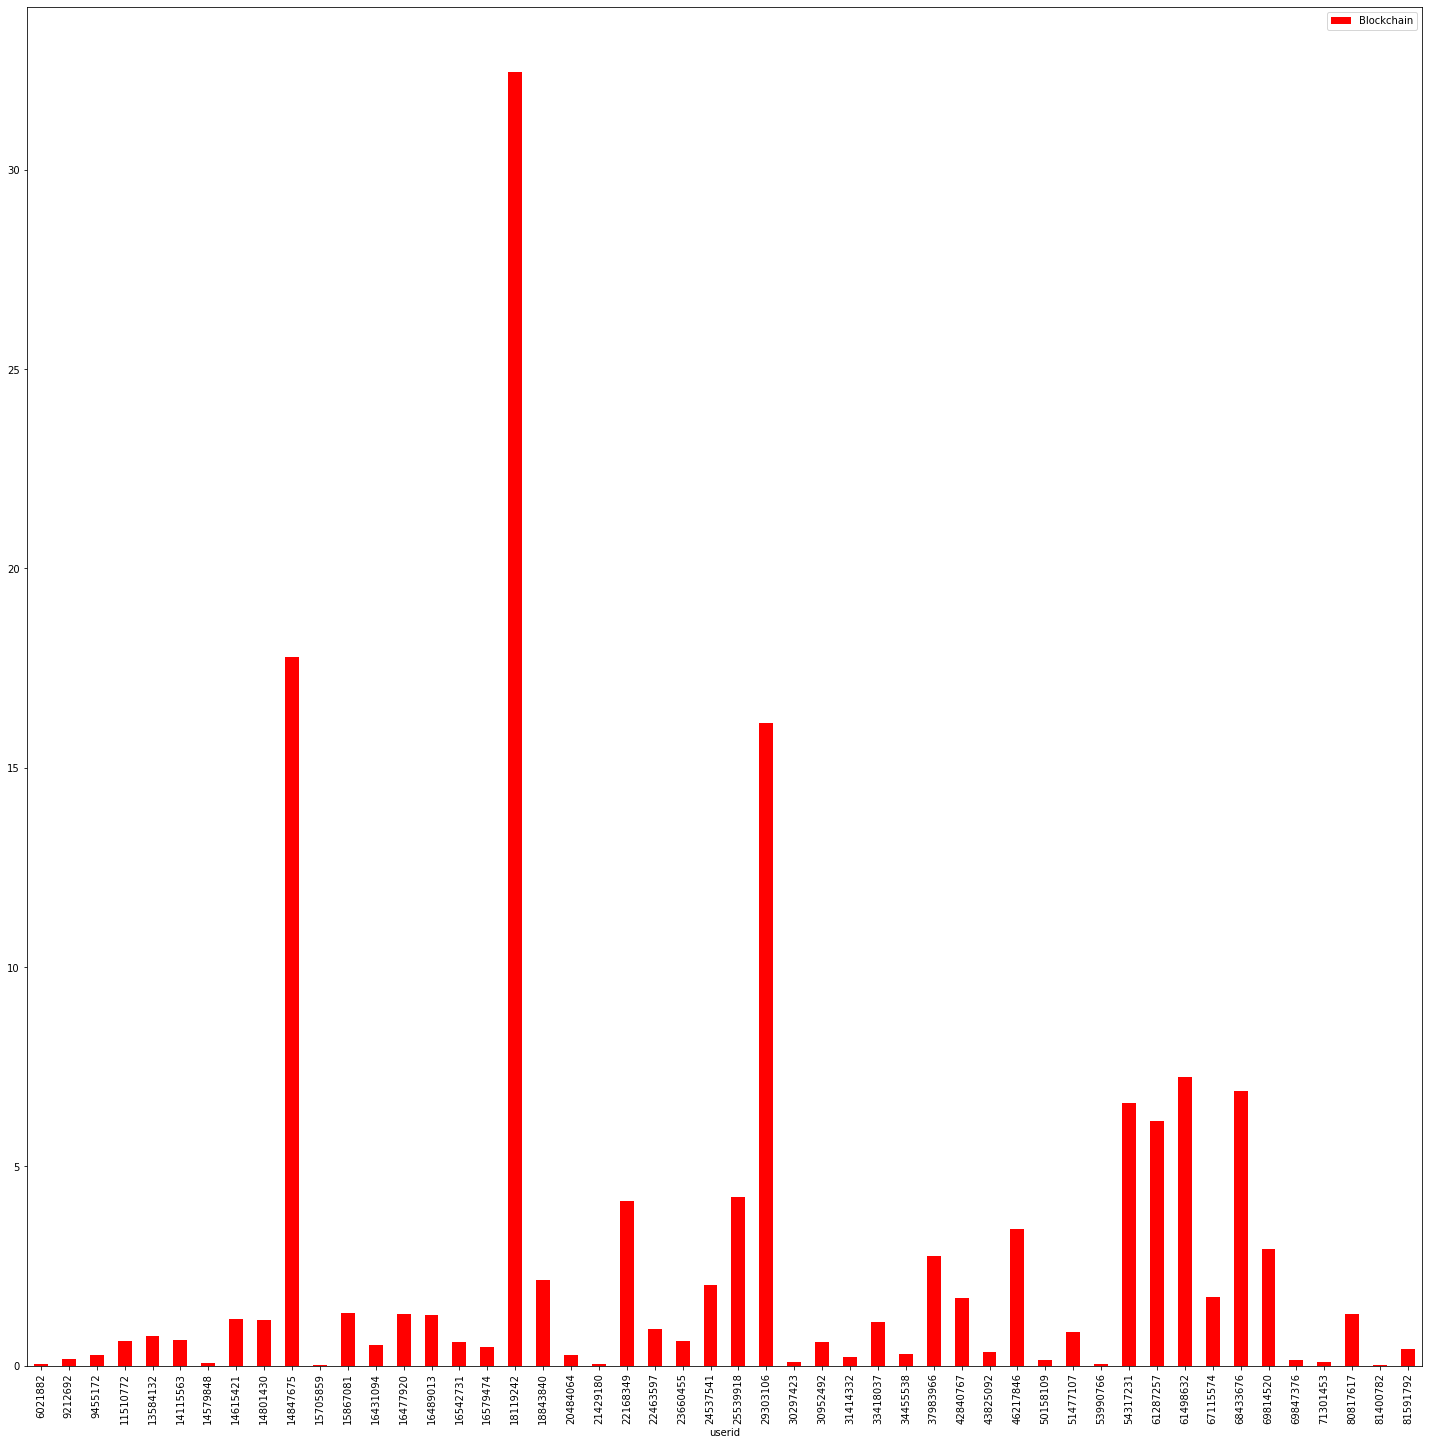

In [43]:
h.plot(x ='userid', y='Blockchain',kind='bar',figsize=(25,25),color='r')

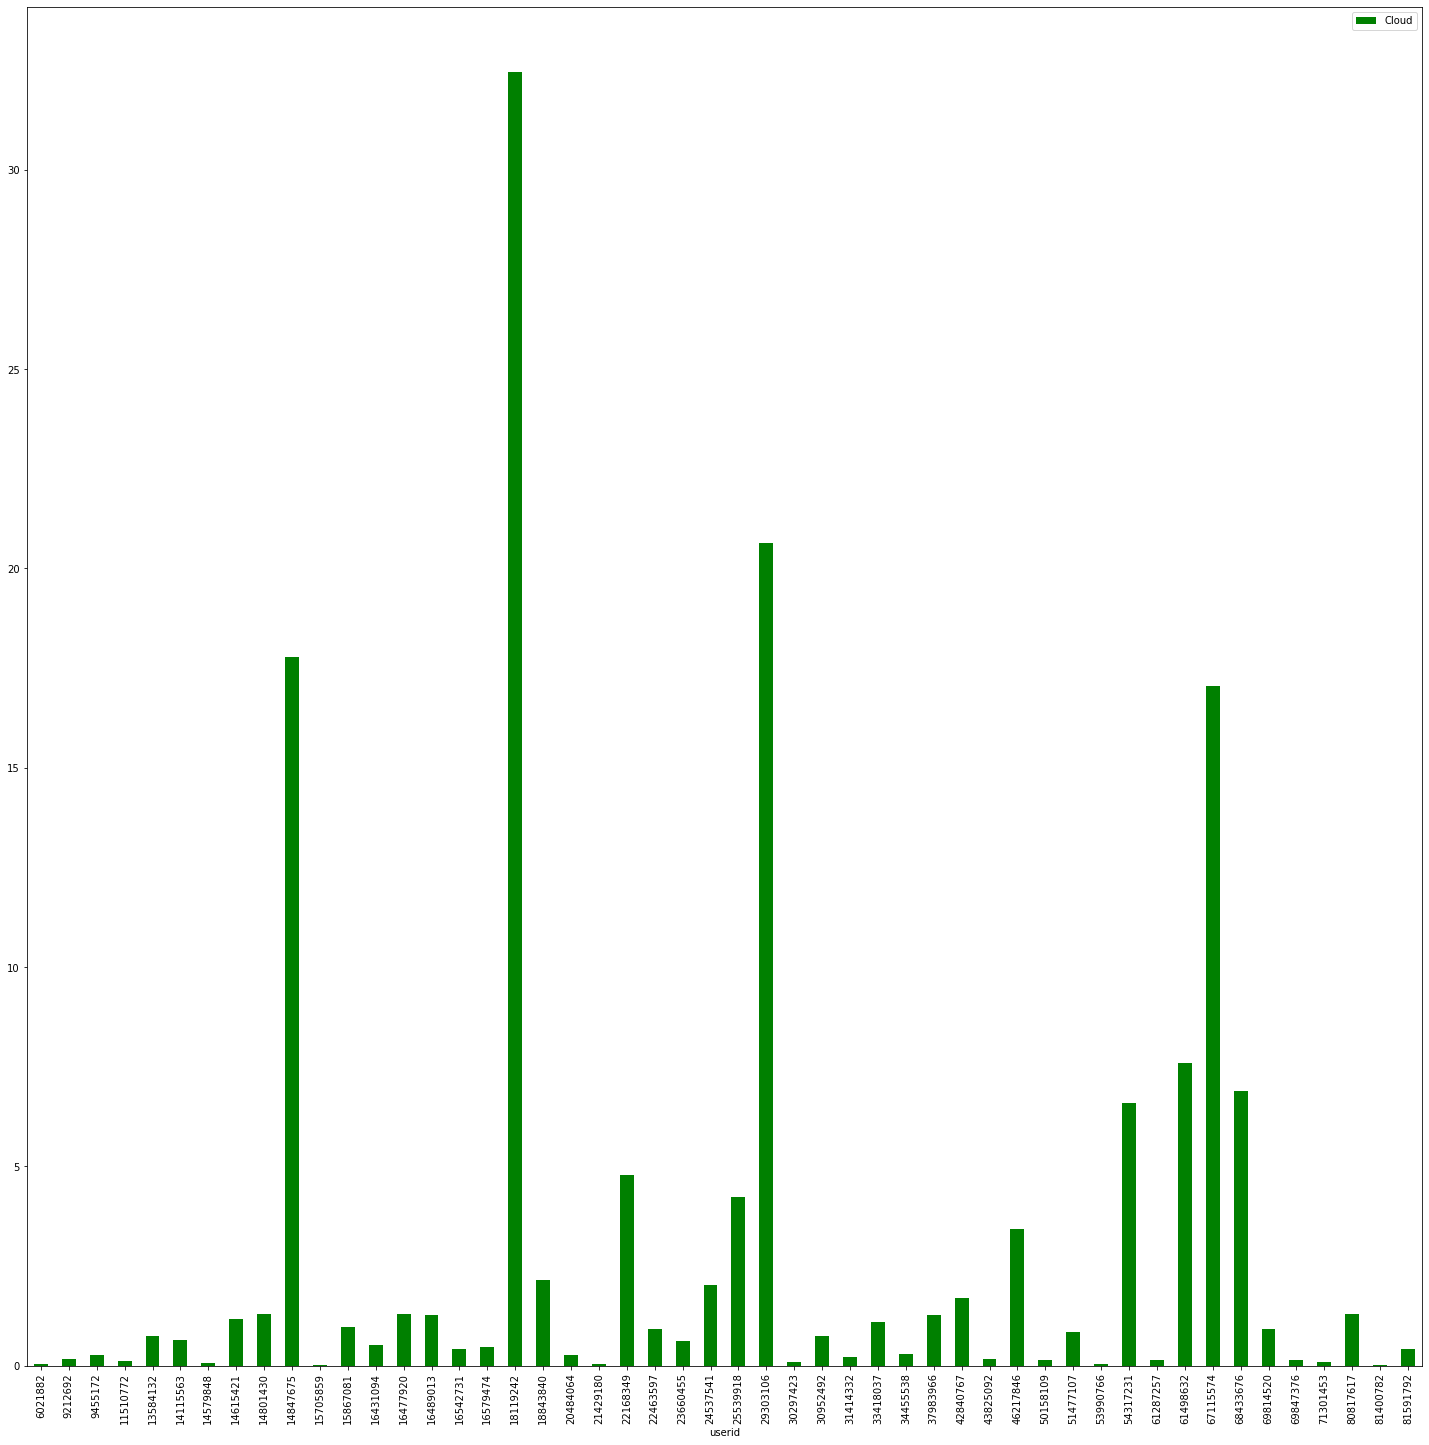

In [44]:
h.plot(x ='userid', y='Cloud',kind='bar',figsize=(25,25),color='g')

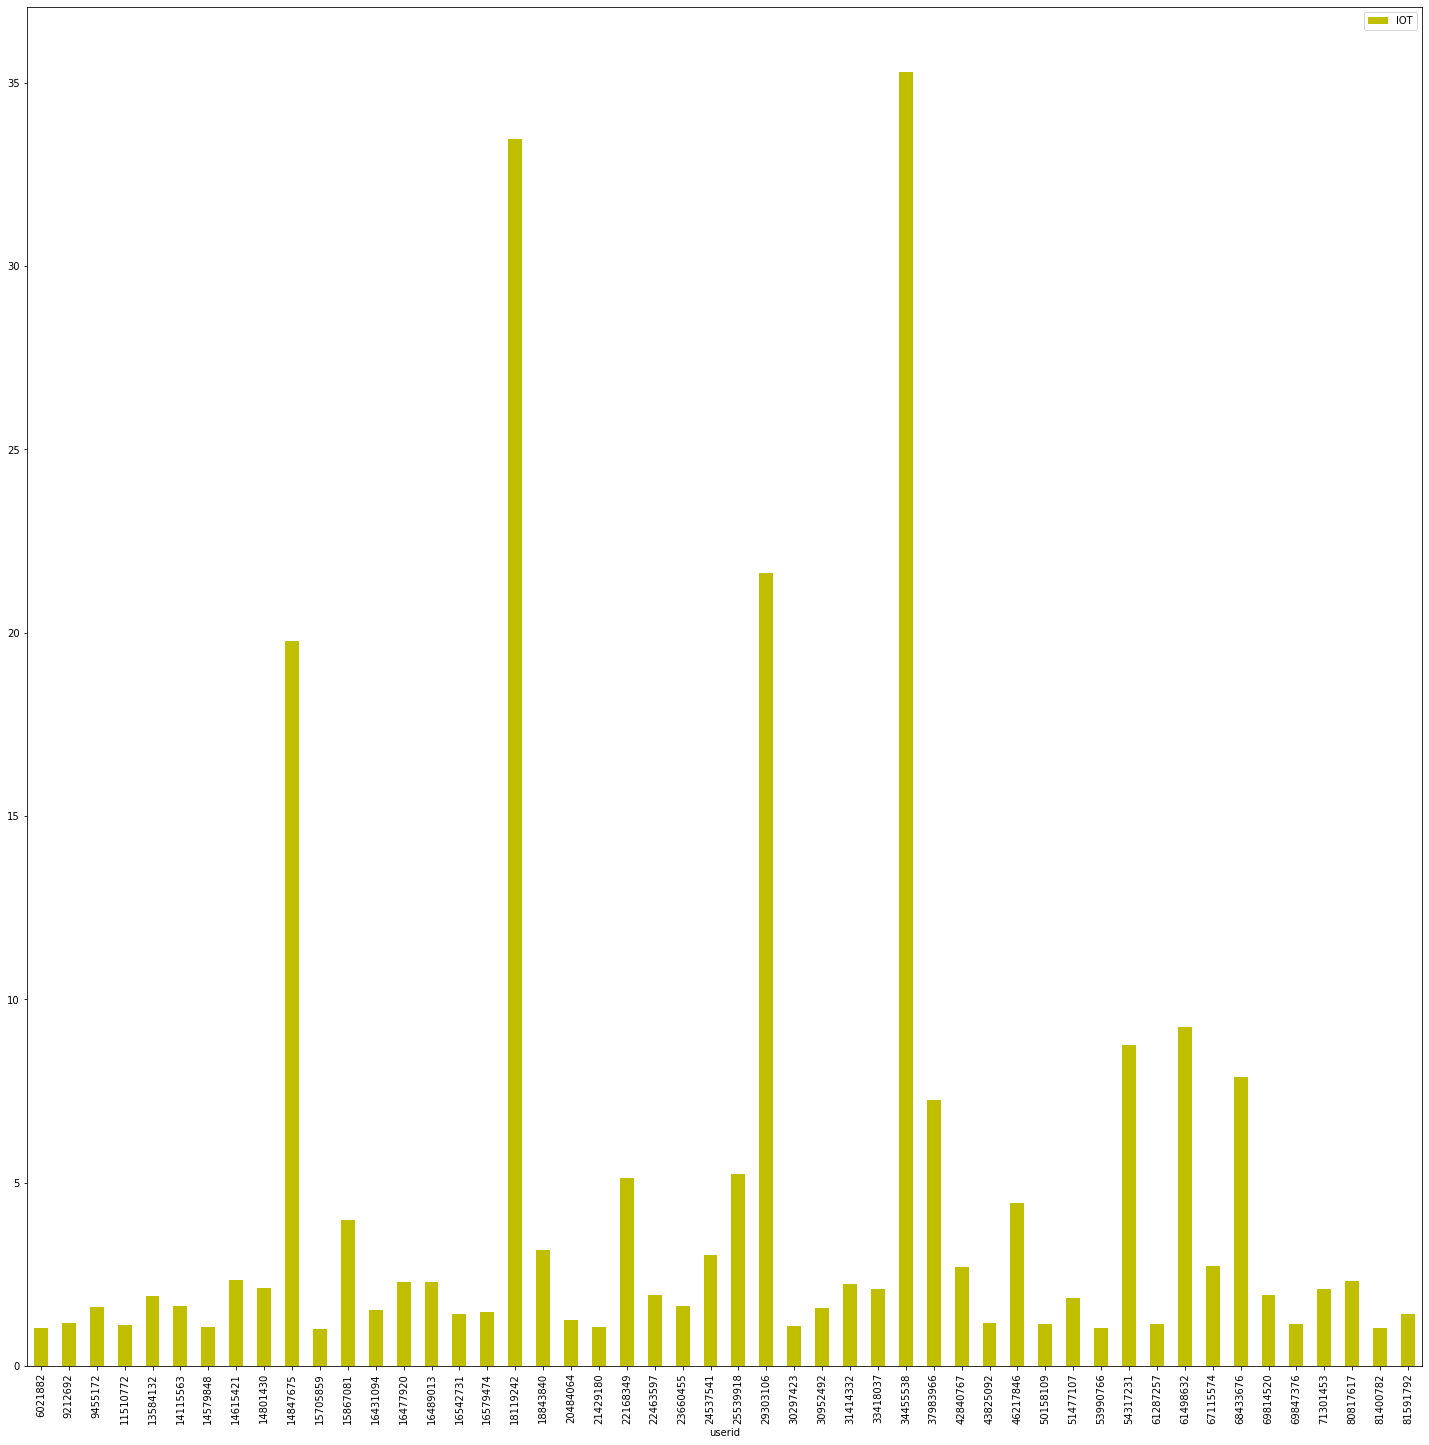

In [126]:
h.plot(x ='userid', y='IOT',kind='bar',figsize=(25,25),color='y')

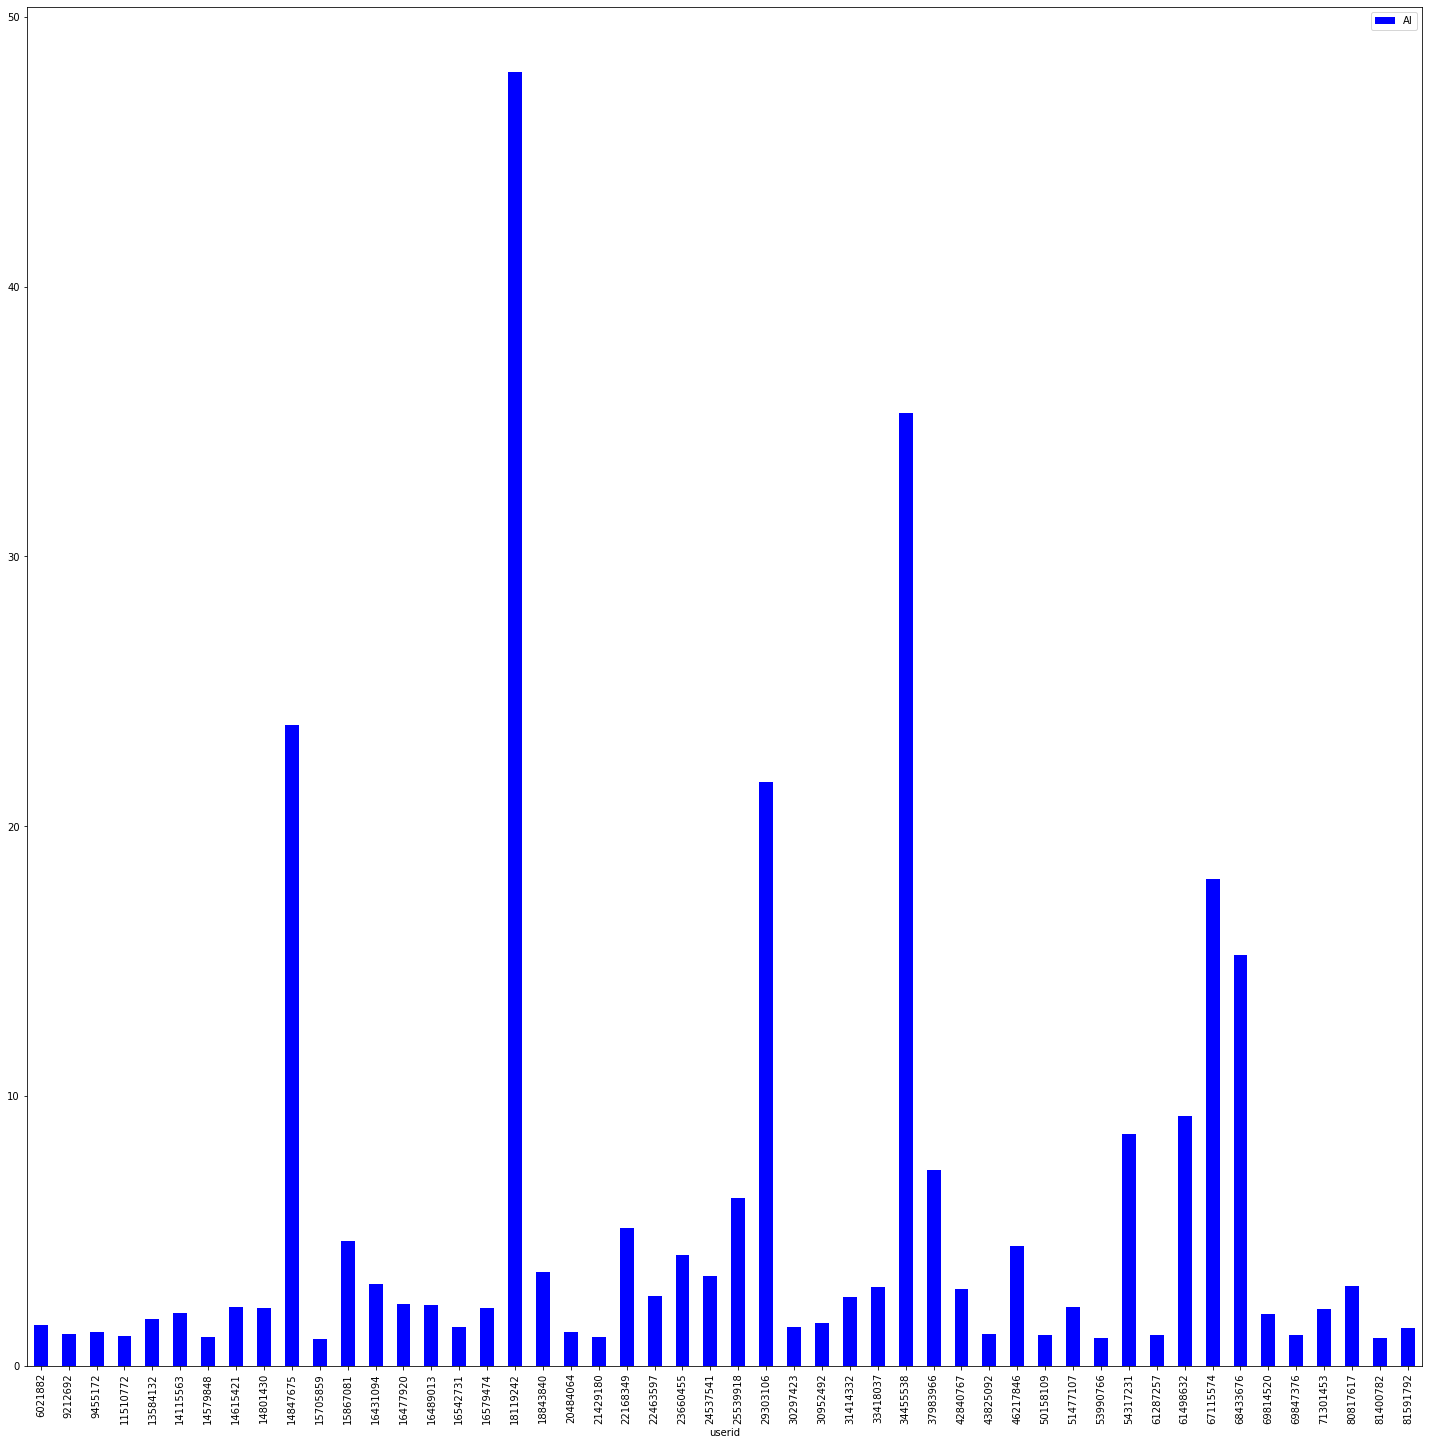

In [127]:
h.plot(x ='userid', y='AI',kind='bar',figsize=(25,25),color='b')

In [69]:
df_new3=df_new2.copy()
df_new3['sum']=0.0

for i in df_new3.index:
    df_new3['sum'][i]=df_new3['Blockchain'][i]+df_new3['Cloud'][i]+df_new3['IOT'][i]+df_new3['AI'][i]
    
for i in df_new3.index:
    df_new3['Blockchain'][i]=df_new3['Blockchain'][i]/df_new3['sum'][i]
    df_new3['Cloud'][i]=df_new3['Cloud'][i]/df_new3['sum'][i]
    df_new3['IOT'][i]=df_new3['IOT'][i]/df_new3['sum'][i]
    df_new3['AI'][i]=df_new3['AI'][i]/df_new3['sum'][i]
    
df_new3
print(df_new3['Blockchain'][3])

0.6441717672898811


<ipython-input-69-2691312f9c7d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new3['sum'][i]=df_new3['Blockchain'][i]+df_new3['Cloud'][i]+df_new3['IOT'][i]+df_new3['AI'][i]
<ipython-input-69-2691312f9c7d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new3['Blockchain'][i]=df_new3['Blockchain'][i]/df_new3['sum'][i]
<ipython-input-69-2691312f9c7d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new3['Cloud'][i]=df_new3['C

0.6441717672898811
0.1992364158939834
0.1992364158939834
0.33460597351002774
0.2669211947020056


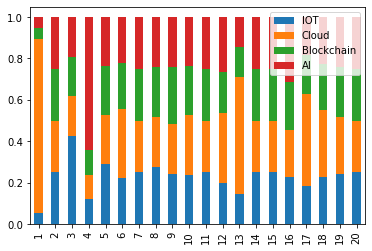

In [70]:
print(df_new3['Blockchain'][3])
# import numpy as np 
import matplotlib.pyplot as plt 
  
# N = 5
  
# boys = (20, 35, 30, 35, 27) 
# girls = (25, 32, 34, 20, 25) 
# boyStd = (2, 3, 4, 1, 2) 
# girlStd = (3, 5, 2, 3, 3) 
# ind = np.arange(N)    
# width = 0.35  
  
# fig = plt.subplots(figsize =(10, 7)) 
# p1 = plt.bar(ind, boys, width, yerr = boyStd) 
# p2 = plt.bar(ind, girls, width, 
#              bottom = boys, yerr = girlStd) 
  
# plt.ylabel('Contribution') 
# plt.title('Contribution by the reseachers') 
# plt.xticks(ind, ('Blockchain', 'Cloud', 'IOT', 'AI')) 
n1=[]
n1= [0 for i in range(20)]
n2=[]
n2= [0 for i in range(20)]
n3=[]
n3= [0 for i in range(20)]
n4=[]
n4= [0 for i in range(20)]
j=0
for i in df_new3.index:
    if j>=20:
        break
    n1[j]=df_new3['IOT'][i]
    n2[j]=df_new3['Cloud'][i]
    n3[j]=df_new3['AI'][i]
    n4[j]=df_new3['Blockchain'][i]
    j=j+1

# for i in range(0,15):
#     n11[i]=n1[i]
#     n22[i]=n2[i]
#     n33[i]=n3[i]
#     n44[i]=n4[i]
#n1=df_new3['IOT'].to_numpy()
# n2=df_new3['Blockchain'].to_numpy()
# n3=df_new3['Cloud'].to_numpy()
# n4=df_new3['AI'].to_numpy()

print(n1[11])
print(n2[11])
print(n3[11])
print(n4[11])
index=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20']
df = pd.DataFrame({'IOT': n1,'Cloud': n3,'Blockchain': n2,'AI':n4}, index=index)

ax = df.plot.bar(stacked=True)
# df_new3 = pd.DataFrame(np.random.rand(15, 4), columns=['Blockchain', 'Cloud', 'IOT', 'AI'])
# df_new3.plot.bar(stacked=False);

In [130]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from itertools import combinations
import random
from collections import defaultdict 
import re 
import tweepy 
from tweepy import OAuthHandler 
from textblob import TextBlob 
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import nltk 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [133]:
df1

,userid,timestamp,tweet_text,username,all_hashtags,followers_count,following_count,allnumberoftweetscount,retweets,likes
0,1280881940351107074,2020-11-21 23:59:25,"b""#Siacoin hits three-tenths of a penny! $136...",b'BuildForFreedom',"['Siacoin', 'Bitcoin', 'Ethereum', 'cryptocurr...",63,85,479,1,2
1,729754661213884416,2020-11-21 23:58:56,"b'New article: ""Bulls hit the free-agent marke...",b'FinTechZoom',"['Fintech', 'Blockchain', 'Crypto', 'Cryptocur...",4580,360,101229,0,0
2,1241749653013630976,2020-11-21 23:58:52,b'\xf0\x9f\x92\xbb#Montreal #tech firm GSoft g...,b'NancyTr83158469',"['Montreal', 'tech', 'digital', 'office', 'Sta...",1898,1816,4985,10,10
3,16579474,2020-11-21 23:58:24,"b""Get real! Don't believe everything you see,...",b'JohnOneFive',"['FakeFaces', 'ArtificialIntelligence', 'AI', ...",2603,0,189,4,0
4,2794378935,2020-11-21 23:57:21,b'Are you looking to rapidly expand your home ...,b'patriciamerch10',"['videoconferencing', 'stayconnected', 'cloud']",387,721,1409,1,2
5,729754661213884416,2020-11-21 23:56:56,"b'New article: ""America Airlines - Struggling...",b'FinTechZoom',"['Fintech', 'Blockchain', 'Crypto', 'Cryptocur...",4580,360,101229,0,0
6,254848319,2020-11-21 23:55:45,b'The 10 Coolest IoT Startups Of 2020 #iot #ii...,b'connect4growth',"['iot', 'iiot', 'internetofthings']",1060,2769,3416,1,0
7,2211900062,2020-11-21 23:55:34,b'@berkinovy I calculated Xrp could go down 14...,b'crypto_hal9k',"['Bitcoin', 'Altcoins', 'crypto', 'cryptocurre...",52,53,653,1,0
8,277468962,2020-11-21 23:55:18,b'Is Blockchain the Perfect Defense Against DD...,b'PenTestMag',"['pentest', 'magazine', 'pentestmag', 'pentest...",18003,699,9422,5,4
9,148103797,2020-11-21 23:55:08,b'Here\xe2\x80\x99s how #Technology has change...,b'PaulMBaker',"['Technology', 'world', 'bigdata', 'AI', 'IoT'...",2366,3334,21273,3,1


In [134]:
g=df1['tweet_text']
g

0      b"#Siacoin hits three-tenths of a penny!  $136...
1      b'New article: "Bulls hit the free-agent marke...
2      b'\xf0\x9f\x92\xbb#Montreal #tech firm GSoft g...
3      b"Get real!  Don't believe everything you see,...
4      b'Are you looking to rapidly expand your home ...
5      b'New article: "America Airlines  - Struggling...
6      b'The 10 Coolest IoT Startups Of 2020 #iot #ii...
7      b'@berkinovy I calculated Xrp could go down 14...
8      b'Is Blockchain the Perfect Defense Against DD...
9      b'Here\xe2\x80\x99s how #Technology has change...
10     b'Atari Token staking and wallet are live on h...
11     b'#Bitcoin #Blockchain Stretched thin? Wrapped...
12     b'New article: "America Airlines  - American A...
13     b'\xf0\x9f\x99\x8c Correction Healthy, XRP to ...
14     b'$NWC are launching their crypto APP in about...
15     b'iot supply chain  #IoT #IIoT #IoTPL #Intrern...
16     b'Business doubts? We, @GFACCORD, #bigdata #AI...
17     b'@ataritoken staking an

In [135]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [137]:
k=remove_url(g[0])
k

'bSiacoin hits threetenths of a penny 136463652 market cap Criminally Underrated Lets build the Free Internet Bitcoin Ethereum cryptocurrency web3 cloud BTC SC'

In [138]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [139]:
dict=[]
for j in range(0,500):
    f=remove_url(g[j])
    dict.append(f)
    
sid = SentimentIntensityAnalyzer()
sid


In [140]:
import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob


In [141]:
sentiment_objects = [TextBlob(tweet) for tweet in dict]

sentiment_objects[0].polarity, sentiment_objects[0]

(0.0,
 TextBlob("bSiacoin hits threetenths of a penny 136463652 market cap Criminally Underrated Lets build the Free Internet Bitcoin Ethereum cryptocurrency web3 cloud BTC SC"))

In [142]:
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[0]

[0.0,
 'bSiacoin hits threetenths of a penny 136463652 market cap Criminally Underrated Lets build the Free Internet Bitcoin Ethereum cryptocurrency web3 cloud BTC SC']

In [143]:
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df

,polarity,tweet
0,0.000000,bSiacoin hits threetenths of a penny 136463652...
1,0.000000,bNew article Bulls hit the freeagent market in...
2,0.012500,bxf0x9fx92xbbMontreal tech firm GSoft goes dig...
3,0.300000,bGet real Dont believe everything you see read...
4,0.225000,bAre you looking to rapidly expand your home w...
5,0.000000,bNew article America Airlines Struggling airli...
6,0.000000,bThe 10 Coolest IoT Startups Of 2020 iot iiot ...
7,0.114815,bberkinovy I calculated Xrp could go down 1424...
8,1.000000,bIs Blockchain the Perfect Defense Against DDo...
9,0.000000,bHerexe2x80x99s how Technology has changed the...


In [144]:
for i in range(0,499):
    if sentiment_df['polarity'][i]>0.0:
        sentiment_df['polarity'][i]=1
    if sentiment_df['polarity'][i]<0.0:
        sentiment_df['polarity'][i]=0

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [145]:
dict2=sentiment_df['polarity'].to_list()
dict2

[0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0

In [146]:
h=[int(i) for i in dict2]
h

[0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,


In [147]:
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import nltk 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [148]:
x_p = np.arange(0, 1, 0.1)
x_n = np.arange(0, 1, 0.1)
x_op = np.arange(0, 10, 1)

In [149]:
x_op

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [150]:
p_lo = fuzz.trimf(x_p, [0, 0, 0.5])
p_md = fuzz.trimf(x_p, [0, 0.5, 1])
p_hi = fuzz.trimf(x_p, [0.5, 1, 1])
n_lo = fuzz.trimf(x_n, [0, 0, 0.5])
n_md = fuzz.trimf(x_n, [0, 0.5, 1])
n_hi = fuzz.trimf(x_n, [0.5, 1, 1])
op_Neg = fuzz.trimf(x_op, [0, 0, 5])  # Scale : Neg Neu Pos
op_Neu = fuzz.trimf(x_op, [0, 5, 10])
op_Pos = fuzz.trimf(x_op, [5, 10, 10])

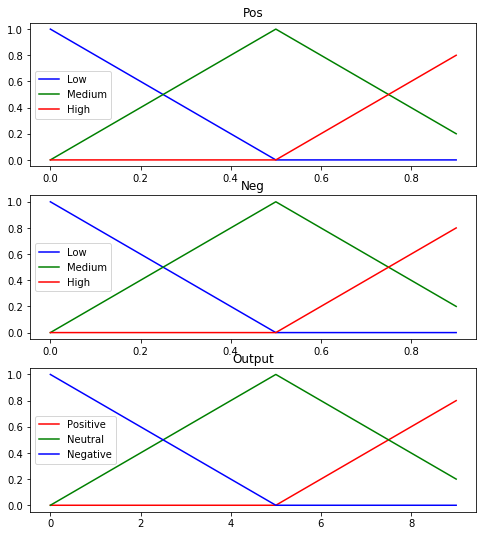

In [151]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))
#
ax0.plot(x_p, p_lo, 'b', linewidth=1.5, label='Low')
ax0.plot(x_p, p_md, 'g', linewidth=1.5, label='Medium')
ax0.plot(x_p, p_hi, 'r', linewidth=1.5, label='High')
ax0.set_title('Pos')
ax0.legend()

ax1.plot(x_n, n_lo, 'b', linewidth=1.5, label='Low')
ax1.plot(x_n, n_md, 'g', linewidth=1.5, label='Medium')
ax1.plot(x_n, n_hi, 'r', linewidth=1.5, label='High')
ax1.set_title('Neg')
ax1.legend()

ax2.plot(x_op, op_Pos, 'r', linewidth=1.5, label='Positive')
ax2.plot(x_op, op_Neu, 'g', linewidth=1.5, label='Neutral')
ax2.plot(x_op, op_Neg, 'b', linewidth=1.5, label='Negative')
ax2.set_title('Output')
ax2.legend()


In [153]:
p=len(sentiment_df)
p

500

In [167]:
sentiment=[]
sentiment_val=[]
sentiment_doc=[]
out=[]
for j in range(p):
    sentiment_doc.append(h[j])
    ss = sid.polarity_scores(dict[j])
    print(ss)
    posscore=ss['pos']
    negscore=ss['neg']
    neuscore=ss['neu']
    compoundscore=ss['compound']
   
    print(str(j+1)+" {:-<65} {}".format(dict[j], str(ss))) 
    
    print("\nPositive Score for each  tweet :")    
    if (posscore==1):
        posscore=0.9 
    else:
        posscore=round(posscore,1)
    print(posscore)

    print("\nNegative Score for each  tweet :")
    if (negscore==1):
        negscore=0.9
    else:
        negscore=round(negscore,1)
    print(negscore)
    
# We need the activation of our fuzzy membership functions at these values.
    p_level_lo = fuzz.interp_membership(x_p, p_lo, posscore)
    p_level_md = fuzz.interp_membership(x_p, p_md, posscore)
    p_level_hi = fuzz.interp_membership(x_p, p_hi, posscore)
    
    n_level_lo = fuzz.interp_membership(x_n, n_lo, negscore)
    n_level_md = fuzz.interp_membership(x_n, n_md, negscore)
    n_level_hi = fuzz.interp_membership(x_n, n_hi, negscore)
    
    # Now we take our rules and apply them. Rule 1 concerns bad food OR nice.
    # The OR operator means we take the maximum of these two.
    active_rule1 = np.fmin(p_level_lo, n_level_lo)
    active_rule2 = np.fmin(p_level_md, n_level_lo)
    active_rule3 = np.fmin(p_level_hi, n_level_lo)
    active_rule4 = np.fmin(p_level_lo, n_level_md)
    active_rule5 = np.fmin(p_level_md, n_level_md)
    active_rule6 = np.fmin(p_level_hi, n_level_md)
    active_rule7 = np.fmin(p_level_lo, n_level_hi)
    active_rule8 = np.fmin(p_level_md, n_level_hi)
    active_rule9 = np.fmin(p_level_hi, n_level_hi)
    
    # Now we apply this by clipping the top off the corresponding output
    # membership function with `np.fmin`
    
    
    n1=np.fmax(active_rule4,active_rule7)
    n2=np.fmax(n1,active_rule8)     
    op_activation_lo = np.fmin(n2,op_Neg)
    
    neu1=np.fmax(active_rule1,active_rule5)
    neu2=np.fmax(neu1,active_rule9)     
    op_activation_md = np.fmin(neu2,op_Neu)
    
    p1=np.fmax(active_rule2,active_rule3)
    p2=np.fmax(p1,active_rule6)   
    op_activation_hi = np.fmin(p2,op_Pos)
    
    op0 = np.zeros_like(x_op)
    
    # Aggregate all three output membership functions together
    aggregated = np.fmax(op_activation_lo,
                         np.fmax(op_activation_md, op_activation_hi))
    
    # Calculate defuzzified result
    op = fuzz.defuzz(x_op, aggregated, 'centroid')
    output=round(op,2)
    out.append(output)

    op_activation = fuzz.interp_membership(x_op, aggregated, op)  # for plot


    print("\nFiring Strength of Negative (wneg): "+str(round(n2,4)))
    print("Firing Strength of Neutral (wneu): "+str(round(neu2,4)))
    print("Firing Strength of Positive (wpos): "+str(round(p2,4)))
    
    print("\nResultant consequents MFs:" )
    print("op_activation_low: "+str(op_activation_lo))
    print("op_activation_med: "+str(op_activation_md))
    print("op_activation_high: "+str(op_activation_hi))
    
    print("\nAggregated Output: "+str(aggregated))

    print("\nDefuzzified Output: "+str(output))

# Scale : Neg Neu Pos   
#    if 0<(output)<4.60:    # R
#        print("\nOutput after Defuzzification: Negative")
#        sentiment.append("Negative")
#        sentiment_val.append('0')
#    elif 4.61<(output)<4.81:
#         print("\nOutput after Defuzzification: Neutral")
#         sentiment.append("Neutral")
#         sentiment_val.append('2')
   
#     elif 4.82<(output)<10:
#         print("\nOutput after Defuzzification: Positive")
#         sentiment.append("Positive")
#         sentiment_val.append('1')

    if 0<(output)<4.55:    # R
        print("\nOutput after Defuzzification: Negative")
        sentiment.append("Negative")
        sentiment_val.append('-1')
  
    elif 4.56<(output)<10:
        print("\nOutput after Defuzzification: Positive")
        sentiment.append("Positive")
        sentiment_val.append('1')
        
        
        
    print("Doc sentiment: " +str(dict2[j])+"\n")   
    
    
# count=0
# for k in range(len(doc)):
#     if(sentiment_doc[k]==sentiment[k]):
#         count=count+1       
# print("Accuracy is: "+ str(round(count/len(doc)*100,2)))

# from sklearn.metrics import f1_score, precision_score, recall_score
# y_true = sentiment_doc
# y_pred = sentiment

# p1=precision_score(y_true, y_pred, average='macro')  

# print("Precision score (MACRO): " + str(round((p1*100),2)))

# r1=recall_score(y_true, y_pred, average='macro')  

# print("Recall score (MACRO): " + str(round((r1*100),2)))

# f1=f1_score(y_true, y_pred, average='macro')  
# f2=f1_score(y_true, y_pred, average='micro')  

# print("F1 score (MACRO): " + str(round((f1*100),2)))
# print("F1 score (MICRO): "+ str(round((f2*100),2)))

# end = time.time()
# print("Execution Time: "+str(round((end - start),3))+" secs")

{'neg': 0.0, 'neu': 0.864, 'pos': 0.136, 'compound': 0.5106}
1 bSiacoin hits threetenths of a penny 136463652 market cap Criminally Underrated Lets build the Free Internet Bitcoin Ethereum cryptocurrency web3 cloud BTC SC {'neg': 0.0, 'neu': 0.864, 'pos': 0.136, 'compound': 0.5106}

Positive Score for each  tweet :
0.1

Negative Score for each  tweet :
0.0

Firing Strength of Negative (wneg): 0.0
Firing Strength of Neutral (wneu): 0.8
Firing Strength of Positive (wpos): 0.2

Resultant consequents MFs:
op_activation_low: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
op_activation_med: [0.  0.2 0.4 0.6 0.8 0.8 0.8 0.6 0.4 0.2]
op_activation_high: [0.  0.  0.  0.  0.  0.  0.2 0.2 0.2 0.2]

Aggregated Output: [0.  0.2 0.4 0.6 0.8 0.8 0.8 0.6 0.4 0.2]

Defuzzified Output: 4.91

Output after Defuzzification: Positive
Doc sentiment: 0.0

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
2 bNew article Bulls hit the freeagent market inking veteran guard Garrett Temple has been published on Fintech Zoom 

In [173]:
sentiment_val

['1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '-1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '-1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '-1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '-1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '-1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',

In [171]:
gh

,userid,followers_count,following_count,allnumberoftweetscount,retweets,likes,Blockchain,Cloud,IOT,AI
0,1280881940351107072,63,85,479,1,2,0.0,1.0,0.0,0.0
1,840479603143630848,44,1,63939,0,1,1.0,0.0,0.0,0.0
2,1252165525565779968,1308,1296,2208,3,20,1.0,0.0,0.0,0.0
3,941804156754460672,10942,621,6291,5,32,1.0,0.0,0.0,0.0
4,14847675,96680,70721,254096,1,5,0.0,0.0,0.0,1.0
5,1194490507147104256,361,1374,2196,0,1,1.0,0.0,0.0,0.0
6,4270073055,6,231,73,0,0,1.0,0.0,0.0,0.0
7,71301453,552,1109,189532,0,0,0.0,0.0,0.0,1.0
8,511723825,3700,3497,21302,0,0,0.0,0.0,0.0,1.0
9,1146995650719973376,1770,4644,1787,2,6,1.0,0.0,0.0,0.0


In [189]:
c=['senti']
n = pd.DataFrame(sentiment_val,columns=c) 
n['senti_int']=0

for i in n.index:
    n['senti_int'][i]=int(n['senti'][i])

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [190]:
n

,senti,senti_int
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


In [192]:
for i in gh.index:
    gh['Blockchain'][i]=gh['Blockchain'][i]*n['senti_int'][i]
    gh['Cloud'][i]=gh['Cloud'][i]*n['senti_int'][i]
    gh['IOT'][i]=gh['IOT'][i]*n['senti_int'][i]
    gh['AI'][i]=gh['AI'][i]*n['senti_int'][i]

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\hp\Anaconda3\lib\site-package

In [193]:
gh

,userid,followers_count,following_count,allnumberoftweetscount,retweets,likes,Blockchain,Cloud,IOT,AI
0,1280881940351107072,63,85,479,1,2,0.0,1.0,0.0,0.0
1,840479603143630848,44,1,63939,0,1,1.0,0.0,0.0,0.0
2,1252165525565779968,1308,1296,2208,3,20,1.0,0.0,0.0,0.0
3,941804156754460672,10942,621,6291,5,32,1.0,0.0,0.0,0.0
4,14847675,96680,70721,254096,1,5,0.0,0.0,0.0,1.0
5,1194490507147104256,361,1374,2196,0,1,1.0,0.0,0.0,0.0
6,4270073055,6,231,73,0,0,1.0,0.0,0.0,0.0
7,71301453,552,1109,189532,0,0,0.0,0.0,0.0,1.0
8,511723825,3700,3497,21302,0,0,0.0,0.0,0.0,1.0
9,1146995650719973376,1770,4644,1787,2,6,1.0,0.0,0.0,0.0


In [194]:
#df_normalized Retweets_likes_normalized    
for i in gh.index:
    gh['Blockchain'][i]=gh['Blockchain'][i]*df_normalized['Retweets_likes_normalized'][i]
    gh['Cloud'][i]=gh['Cloud'][i]*df_normalized['Retweets_likes_normalized'][i]
    gh['IOT'][i]=gh['IOT'][i]*df_normalized['Retweets_likes_normalized'][i]
    gh['AI'][i]=gh['AI'][i]*df_normalized['Retweets_likes_normalized'][i]

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\hp\Anaconda3\lib\site-pack

In [195]:
gh

,userid,followers_count,following_count,allnumberoftweetscount,retweets,likes,Blockchain,Cloud,IOT,AI
0,1280881940351107072,63,85,479,1,2,0.000000,0.500000,0.000000,0.000000
1,840479603143630848,44,1,63939,0,1,0.166667,0.000000,0.000000,0.000000
2,1252165525565779968,1308,1296,2208,3,20,3.833333,0.000000,0.000000,0.000000
3,941804156754460672,10942,621,6291,5,32,6.166667,0.000000,0.000000,0.000000
4,14847675,96680,70721,254096,1,5,0.000000,0.000000,0.000000,1.000000
5,1194490507147104256,361,1374,2196,0,1,0.166667,0.000000,0.000000,0.000000
6,4270073055,6,231,73,0,0,0.000000,0.000000,0.000000,0.000000
7,71301453,552,1109,189532,0,0,0.000000,0.000000,0.000000,0.000000
8,511723825,3700,3497,21302,0,0,0.000000,0.000000,0.000000,0.000000
9,1146995650719973376,1770,4644,1787,2,6,1.333333,0.000000,0.000000,0.000000


In [197]:
gh=gh.groupby(['userid','followers_count'])[["Blockchain", "Cloud", "IOT","AI"]].sum()
gh.reset_index(inplace=True)
gh

,userid,followers_count,Blockchain,Cloud,IOT,AI
0,6021882,185,0.000000,0.000000,0.000000,0.500000
1,9212692,973,0.000000,0.000000,0.000000,0.000000
2,9455172,1480,0.000000,0.000000,0.333333,0.000000
3,11510772,615,0.500000,0.000000,0.000000,0.000000
4,13584132,4056,0.000000,0.000000,0.166667,0.000000
5,14115563,3458,0.000000,0.000000,0.000000,-0.333333
6,14579848,338,0.000000,0.000000,0.000000,0.000000
7,14615421,6371,0.000000,0.000000,0.166667,0.000000
8,14801430,6186,0.000000,0.166667,0.000000,0.000000
9,14847675,96680,0.000000,0.000000,0.000000,4.000000


In [198]:
for i in gh.index:
    gh['Blockchain'][i]=gh['Blockchain'][i]*df_new2['followers_count_normalized'][i]
    gh['Cloud'][i]=gh['Cloud'][i]*df_new2['followers_count_normalized'][i]
    gh['IOT'][i]=gh['IOT'][i]*df_new2['followers_count_normalized'][i]
    gh['AI'][i]=gh['AI'][i]*df_new2['followers_count_normalized'][i]

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\hp\Anaconda3\lib\site-package

In [199]:
gh

,userid,followers_count,Blockchain,Cloud,IOT,AI
0,6021882,185,0.000000,0.000000,0.000000,0.016908
1,9212692,973,0.000000,0.000000,0.000000,0.000000
2,9455172,1480,0.000000,0.000000,0.090603,0.000000
3,11510772,615,0.056420,0.000000,0.000000,0.000000
4,13584132,4056,0.000000,0.000000,0.124204,0.000000
5,14115563,3458,0.000000,0.000000,0.000000,-0.211775
6,14579848,338,0.000000,0.000000,0.000000,0.000000
7,14615421,6371,0.000000,0.000000,0.195112,0.000000
8,14801430,6186,0.000000,0.189446,0.000000,0.000000
9,14847675,96680,0.000000,0.000000,0.000000,71.070386


In [201]:
gh.sort_values(by='Blockchain',ascending=False)

,userid,followers_count,Blockchain,Cloud,IOT,AI
80,234470296,29225,534.391167,0.000000,0.000000,0.000000
225,863060650783895552,75096,301.319750,0.000000,0.000000,0.000000
262,1033739483609481216,19633,137.703604,0.000000,0.000000,0.000000
119,609515212,7626,63.526369,0.000000,0.000000,63.526369
187,4562628468,107802,39.623179,0.000000,0.000000,39.623179
230,905490858656583680,12252,28.518745,0.000000,0.000000,0.000000
339,1428961534241677312,20194,14.844219,0.000000,14.844219,0.000000
239,941804156754460672,10942,12.399496,0.000000,0.000000,0.000000
84,277468962,18003,4.962592,0.000000,0.000000,0.000000
77,226310002,17931,4.393550,0.000000,0.000000,3.295162


In [202]:
gh.sort_values(by='IOT',ascending=False)

,userid,followers_count,Blockchain,Cloud,IOT,AI
195,8526015386,210554,0.000000,0.000000,4901.401807,4901.401807
98,405180712,148336,0.000000,0.000000,2726.089857,2726.089857
128,1069127952,544132,0.000000,0.000000,2133.333333,2133.333333
185,4338452835,173979,0.000000,0.000000,1374.862671,0.000000
125,935026574,234386,0.000000,0.000000,143.583684,143.583684
67,175525728,91944,0.000000,126.729133,126.729133,126.729133
180,3938138368,19068,0.000000,0.000000,123.812219,123.812219
63,162951693,107619,0.000000,0.000000,118.667747,237.335495
26,29303106,87801,0.000000,72.611191,72.611191,72.611191
197,705539763349164032,112779,0.000000,0.000000,62.178777,31.089388


In [204]:
gh.sort_values(by='Cloud',ascending=False)

,userid,followers_count,Blockchain,Cloud,IOT,AI
67,175525728,91944,0.000000,126.729133,126.729133,126.729133
26,29303106,87801,0.000000,72.611191,72.611191,72.611191
83,262641807,26727,0.000000,38.474865,0.000000,0.000000
126,1023481232,131930,0.000000,32.327754,32.327754,64.655509
55,108634462,71746,0.000000,26.370488,52.740976,26.370488
42,67115574,9348,0.000000,26.339368,0.000000,26.339368
215,828774937640841216,8537,0.000000,14.903029,0.000000,0.000000
214,819090046401843200,1495,0.000000,4.576104,0.000000,0.000000
76,223633364,5745,0.000000,3.342822,0.000000,0.000000
41,61498632,39470,0.000000,2.417861,0.000000,0.000000


In [205]:
gh.sort_values(by='AI',ascending=False)

,userid,followers_count,Blockchain,Cloud,IOT,AI
195,8526015386,210554,0.000000,0.000000,4901.401807,4901.401807
111,534563976,272066,0.000000,0.000000,0.000000,4166.659009
98,405180712,148336,0.000000,0.000000,2726.089857,2726.089857
128,1069127952,544132,0.000000,0.000000,2133.333333,2133.333333
17,18119242,176658,0.000000,0.000000,0.000000,470.755480
63,162951693,107619,0.000000,0.000000,118.667747,237.335495
125,935026574,234386,0.000000,0.000000,143.583684,143.583684
67,175525728,91944,0.000000,126.729133,126.729133,126.729133
180,3938138368,19068,0.000000,0.000000,123.812219,123.812219
26,29303106,87801,0.000000,72.611191,72.611191,72.611191
